### Step-by-step Data Cleaning and EDA on the Online Retail II dataset
#### 1.Load the dataset
######   - Import necessary libraries
######   - Load the dataset

#### 2.Initail Data Exploration
######   - View the first few rows
######   - Check data types
######   - Get basic statistics

#### 3.Handle Missing Values
######   - Check for missing values
######   - Decide on an approach (remove,fill,etc.)

#### 4.Data Transformation
######   - Convert 'InvoiceDate' to datetime format
######   - Create a 'TotalPrice' column (quantity*price)

#### 5.Explore and Handle Negative Values:
######   - Understand why there might be negative values
######   - Decide on an approach (remove,adjust,etc.)

#### 6.Outlier Detection
######   - Use descriptive statistics and visualization
######   - Decide how to handle them

#### 7.Feature Engineering (if necessary)

#### 8.Exploratory Data Analysis
######   - Distribution of 'quantity','price','totalprice'
######   - Analysis of transactions over time
######   - Popular products
######   - Customer analysis

#### 9.Export Cleaned data


### Step 1. Load the Dataset

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/Users/wangyefu/Desktop/求职/Projects/online_retail_II.xlsx"
df = pd.read_excel(file_path)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### Step 2. Initial Data Exploration

In [54]:
# Getting information about data types and non-null values
print(df.info())

# Fetching basic statistics for the numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000   

### Step 3. Handle Missing Values

In [55]:
missing_values = df.isnull().sum()
print(missing_values)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [56]:
df.dropna(subset=['Description'], inplace=True)
df.dropna(subset=['Customer ID'], inplace=True)
missing_values_updated = df.isnull().sum()
print(missing_values_updated)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


### Step 4.Feature Engineering

In [57]:
df['TotalPrice'] = df['Quantity'] * df['Price']

# Extract year, month, day, and hour
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

### Step 5. Basic Data Exploration (revisted)

In [59]:
df_grouped = df.groupby(['Year','Month'])['TotalPrice'].sum()

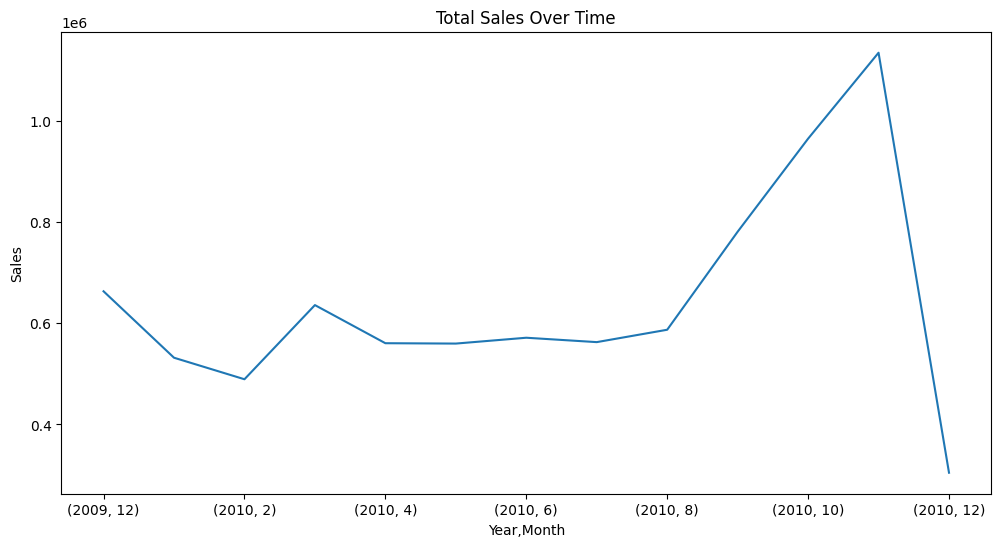

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df_grouped.plot()
plt.title('Total Sales Over Time')
plt.ylabel('Sales')
plt.show()

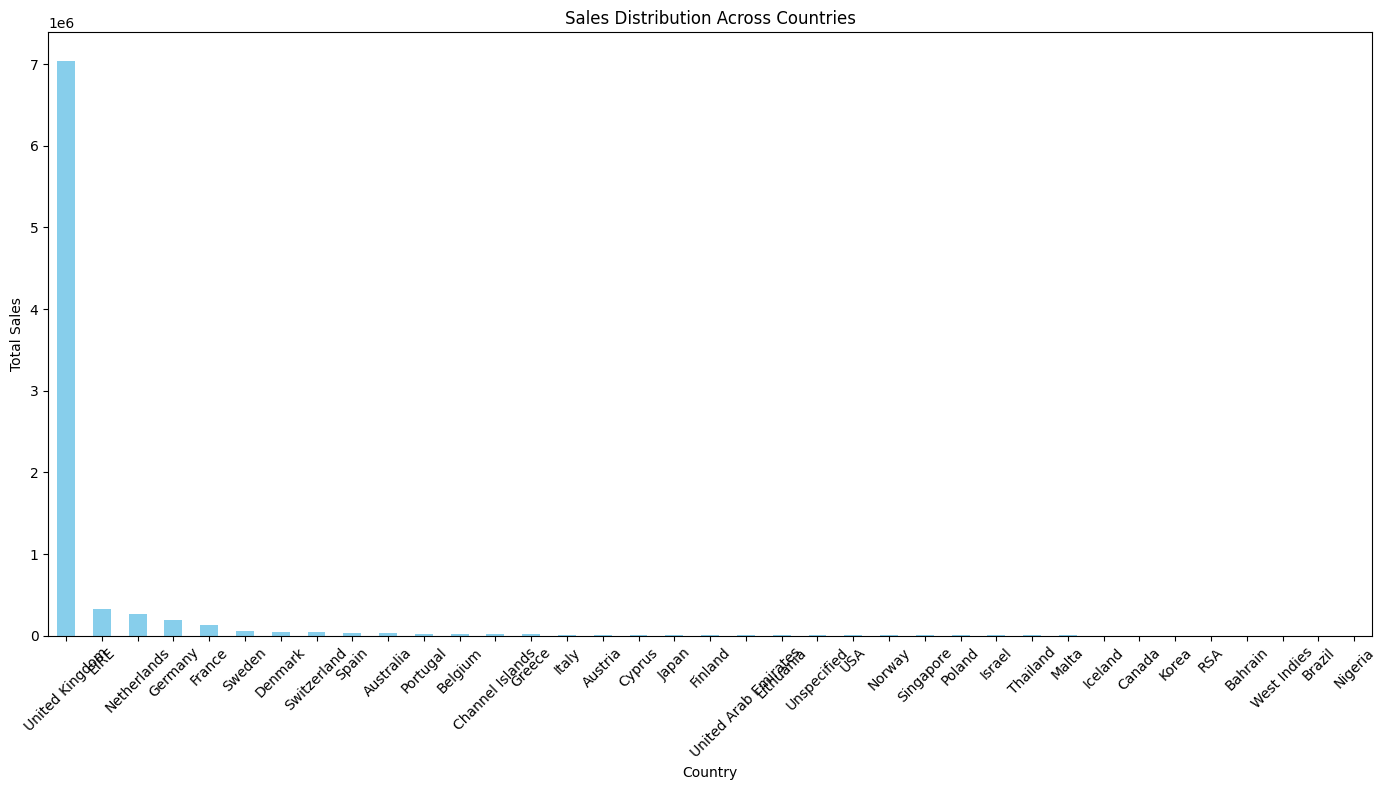

In [61]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution Across Countries')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

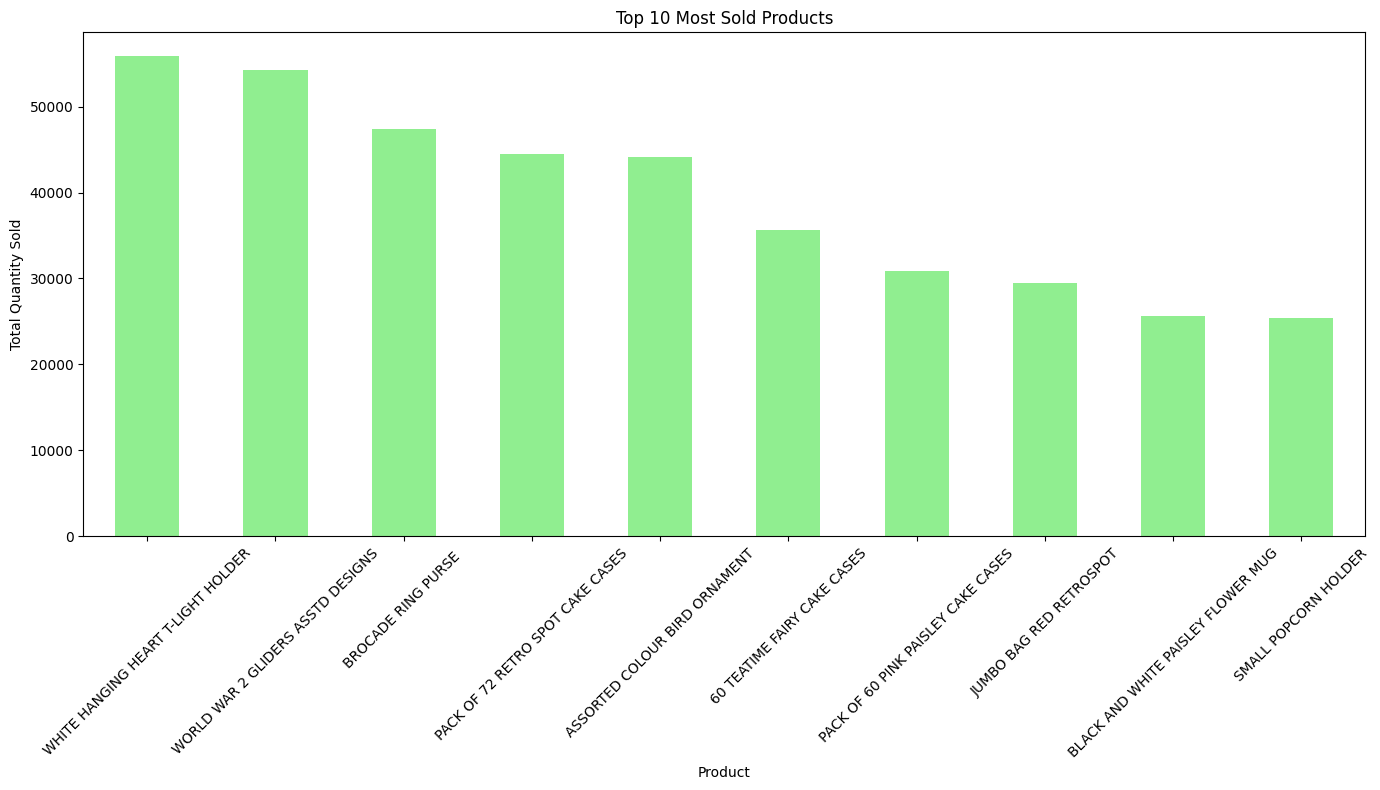

In [62]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Sold Products')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 6. Customer Analysis

##### 6.1 Number of Unique Customers

In [63]:
num_customers = df['Customer ID'].nunique()
print(f"Number of unique customers: {num_customers}")

Number of unique customers: 4383


##### 6.2 Frequency Distribution of Purchases by Customers

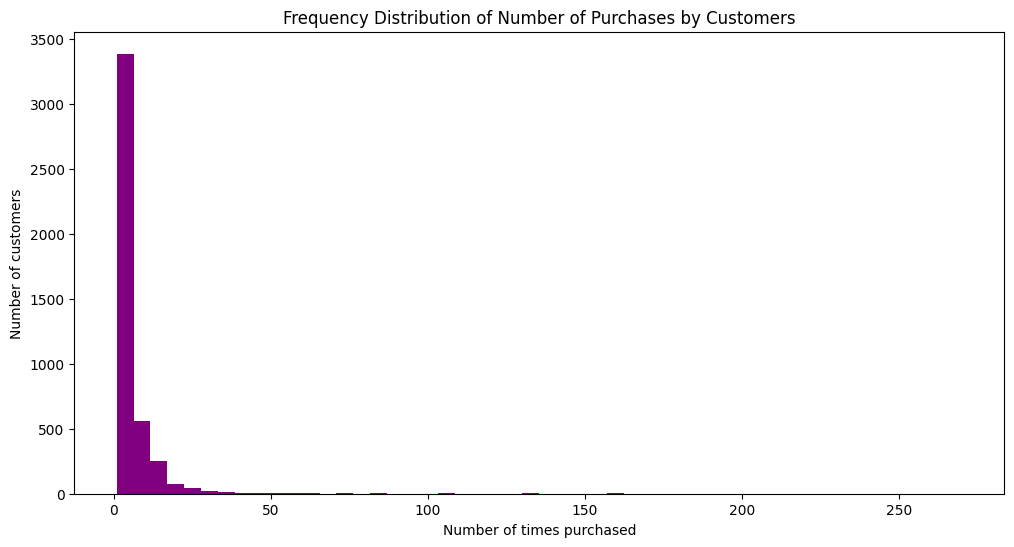

In [64]:
customer_purchases = df.groupby('Customer ID')['Invoice'].nunique()
plt.figure(figsize=(12,6))
customer_purchases.hist(bins=50, color='purple')
plt.title('Frequency Distribution of Number of Purchases by Customers')
plt.xlabel('Number of times purchased')
plt.ylabel('Number of customers')
plt.grid(False)
plt.show()

### Step 7. Return Analysis

##### 7.1 Number of Returned Orders

In [65]:
# Quantity of returns
returns = df[df['Quantity'] < 0]
num_returns = returns['Invoice'].nunique()
print(f"Number of unique return orders: {num_returns}")

Number of unique return orders: 4372


##### 7.2 Most frequently returned products

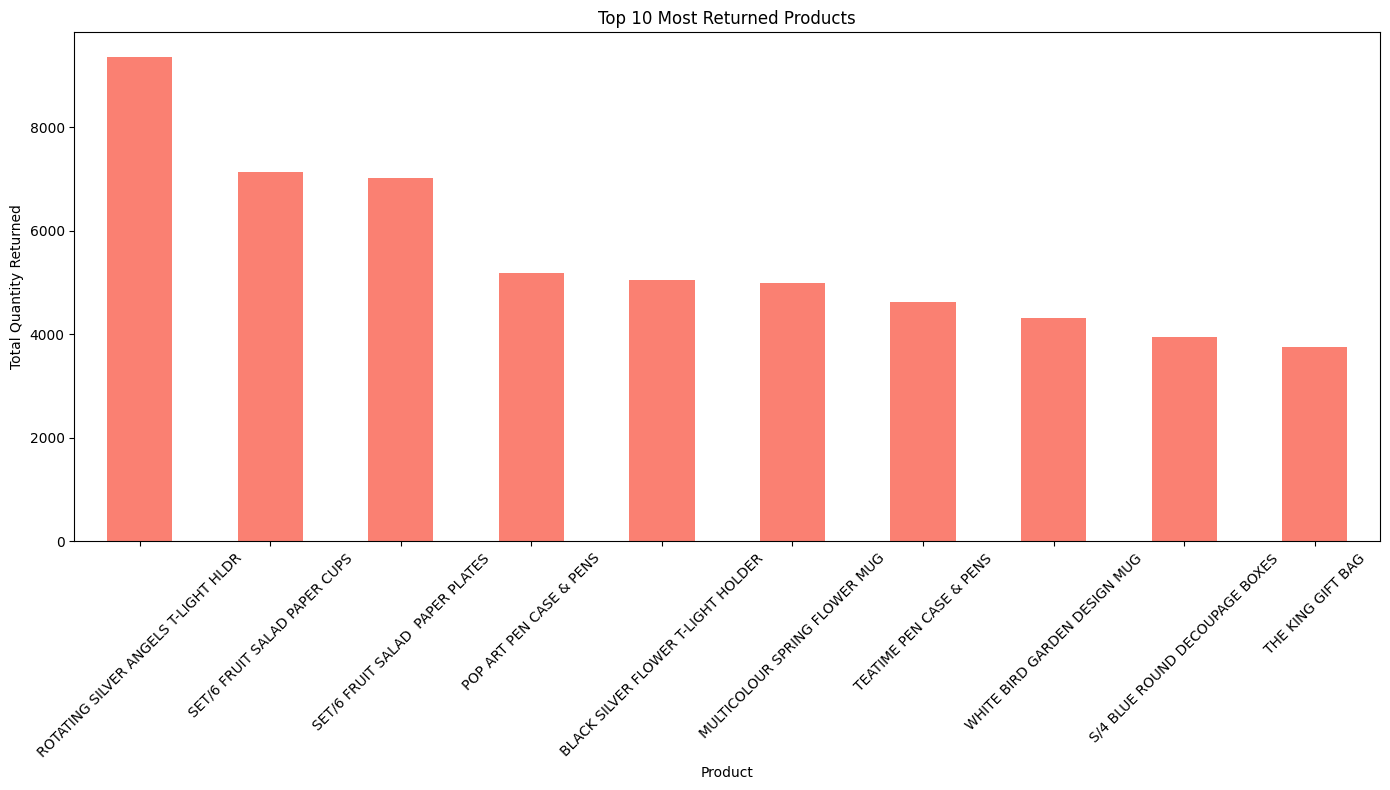

In [66]:
returned_products = returns.groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
returned_products.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Returned Products')
plt.ylabel('Total Quantity Returned')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
df.to_csv('/Users/wangyefu/Desktop/求职/Projects/processed_sales_data.csv', index=False)